### DEMDP16
# Linear-Quadratic Model

Simple Linear-Quadratic control example. Illustrates use of lqsolve.

States
*     s       generic state of dimension ds=3

Actions
*     x       generic action of dimension dx=2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from compecon import LQmodel, nodeunif, demo
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

## One-Dimensional Problem

In [2]:
# Input Model Parameters
F0  =  0.0
Fs  = -1.0
Fx  = -0.0
Fss = -1.0
Fsx =  0.0
Fxx = -0.1
G0  =  0.5
Gs  = -0.2
Gx  =  0.5
delta = 0.9


### Solve model using **LQmodel**

In [3]:
model = LQmodel(F0,Fs,Fx,Fss,Fsx,Fxx,G0,Gs,Gx,delta)

In [4]:
model.steady

{'p': array([[-0.4637]]),
 's': array([[-0.4528]]),
 'v': array([[1.3257]]),
 'x': array([[-2.0867]])}

In [5]:
sstar, xstar, pstar, vstar = model.steady_state

## Plot results

In [6]:
n, smin, smax = 100, -5, 5
s = np.linspace(smin, smax, n)

In [7]:
S = model.solution(s)

### Optimal policy

<function matplotlib.pyplot.plot>

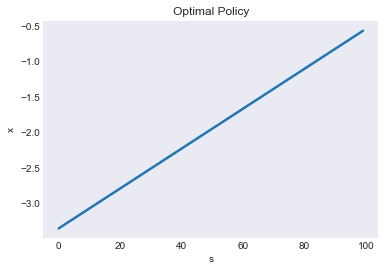

In [8]:
fig1 = demo.figure('Optimal Policy', 's','x')
plt.plot(S['x'])
plt.plot

In [9]:
F0  = 3
Fs  = [1, 0]
Fx  = [1, 1]
Fss = [[-7, -2],[-2, -8]]
Fsx = [[0, 0], [0, 1]]
Fxx = [[-2, 0], [0, -2]]
G0  = [[1], [1]]
Gs  = [[-1, 1],[1, 0]]
Gx  = [[-1, -1],[2, 3]]
delta = 0.95

In [10]:
model2 = LQmodel(F0,Fs,Fx,Fss,Fsx,Fxx,G0,Gs,Gx,delta)

In [11]:
n = [8,8]
ss = nodeunif(n,-1,1)
S2 = model2.solution(ss)

In [12]:
def plot3d(y):
    s0 = S2['s0'].reshape(n)
    s1 = S2['s1'].reshape(n)
    z = S2[y].reshape(n)
    
    fig = plt.figure(figsize=[12, 6])
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(s0, s1, z, rstride=1, cstride=1, cmap=cm.coolwarm,
                linewidth=0, antialiased=False)
    ax.set_xlabel('$s_0$')
    ax.set_ylabel('$s_1$')
    ax.set_zlabel(y)

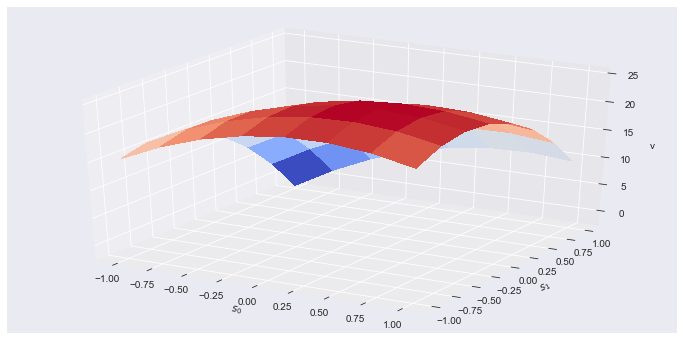

In [13]:
plot3d('v')

[[ 0.6436]
 [-0.3275]]
[[ 0.1272]
 [-0.7418]]


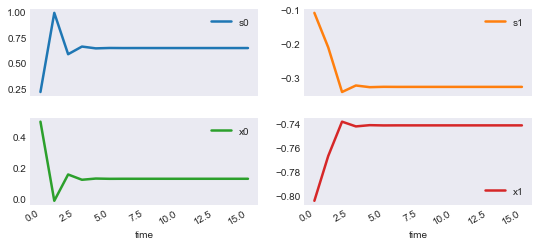

In [36]:
sini = model2.steady['s']/3

data = model2.simulate(16,sini)
data.set_index('time', inplace=True)

data.plot(subplots=True,layout=(2,2), figsize=[9,4])
print(model2.steady['s'])
print(model2.steady['x'])